In [2]:
import pandas as pd
import numpy as np


In [3]:
import seaborn as sn
import matplotlib.pyplot as plt

# Read data

In [4]:
data = pd.read_csv('full_data_clustered_ssim_V4.csv')
data = data.replace(np.nan,'None')
data = data.drop(columns=['cluster','cluster_2'])
data.columns

Index(['CVE ID', 'Publish Date', 'Update Date',
       'Number Of Related Vulnerabilities', 'index', 'CWE ID',
       'Vulnerability Type(s)', 'Score', 'Access', 'Complexity',
       'Authentication', 'Conf.', 'Integ.', 'Avail', 'CVE Summary',
       'Vulnerability Name', 'Vulnerability Description', 'CLEAN TEXT',
       'CI SCORE', 'CI SCORE GLOVE', 'CI SCORE GLOVE 2', 'CI SCORE GLOVE 50'],
      dtype='object')

# OHE

In [5]:
labelencd_cols = ['Vulnerability Type(s)','Vulnerability Name','Access','Complexity','Authentication','Conf.','Integ.','Avail']
# labelencd_cols = ['Access','Complexity','Authentication','Conf.','Integ.','Avail']


ohe = pd.concat([
    pd.get_dummies(data[labelencd_cols], dtype=int), 
    data['Score'],
    data['Number Of Related Vulnerabilities']
], axis=1)

ohe

Vulnerability Type(s)_+Info  Vulnerability Type(s)_+Info CSRF  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   
...                            ...                               ...   
61693                            0                                 0   
61694                            0                                 0   
61695                            0                                 0   
61696                            0                                 0   
61697                            0                                 0   

       Vulnerability Type(s)_+Info File Inclusion  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
61693                                           0   
61694                                           0   
61695                                           0   
61696                                           0   
61697                                           0   

       Vulnerability Type(s)_+Priv  Vulnerability Type(s)_+Priv +Info  \
0                                0                                  0   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   
...                            ...                                ...   
61693                            0                                  0   
61694                            0                                  0   
61695                            0                                  0   
61696                            0                                  0   
61697                            0                                  0   

       Vulnerability Type(s)_+Priv Bypass  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
61693                                   0   
61694                                   0   
61695                                   0   
61696                                   0   
61697                                   0   

       Vulnerability Type(s)_+Priv Bypass +Info  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
61693                                         0   
61694                                         0   
61695                                         0   
61696                                         0   
61697                                         0   

       Vulnerability Type(s)_+Priv CSRF  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
...                                 ...   
61693                                 0   
61694                                 0   
61695                                 0   
61696                                 0   
6

In [6]:
for col in data[labelencd_cols].columns:
    print(data[col].nunique(),'\t',col)

136 	 Vulnerability Type(s)
261 	 Vulnerability Name
4 	 Access
4 	 Complexity
3 	 Authentication
4 	 Conf.
4 	 Integ.
4 	 Avail


# KMeans

In [20]:
# fit the preprocessed data
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k)
kmeans_clusters = kmeans.fit_predict(ohe)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [21]:
np.unique(kmeans.labels_)

array([0, 1])

In [22]:
cluster_map = pd.DataFrame()
# cluster_map['data_index'] = ohe.index.values
cluster_map['index_clustermap'] = range(1,len(ohe)+1)
cluster_map['Kmeans_clusters'] = kmeans.labels_
cluster_map

index_clustermap  Kmeans_clusters
0                     1                1
1                     2                0
2                     3                0
3                     4                0
4                     5                0
...                 ...              ...
61693             61694                1
61694             61695                0
61695             61696                0
61696             61697                1
61697             61698                0

[61698 rows x 2 columns]

In [23]:
cols = ['index','Vulnerability Type(s)','Vulnerability Name','Access','Complexity','Authentication','Conf.','Integ.','Avail'
       ,'Score','Number Of Related Vulnerabilities']

clustered_data = pd.concat([data[cols] , cluster_map['Kmeans_clusters']] , axis=1)
clustered_data

index Vulnerability Type(s)  \
0          1                   XSS   
1          2               Unknown   
2          3               Unknown   
3          4               Unknown   
4          5               Unknown   
...      ...                   ...   
61693  61694                   XSS   
61694  61695                   DoS   
61695  61696               Unknown   
61696  61697                   XSS   
61697  61698               Unknown   

                                      Vulnerability Name  Access Complexity  \
0      Failure to Preserve Web Page Structure ('Cross...  Remote     Medium   
1                                Improper Authentication  Remote        Low   
2      URL Redirection to Untrusted Site ('Open Redir...  Remote     Medium   
3                              Improper Input Validation  Remote        Low   
4                                            Double Free   Local        Low   
...                                                  ...     ...        ...   
61693  Failure to Preserve Web Page Structure ('Cross...  Remote     Medium   
61694  Uncontrolled Resource Consumption ('Resource E...  Remote        Low   
61695  URL Redirection to Untrusted Site ('Open Redir...  Remote     Medium   
61696  Failure to Preserve Web Page Structure ('Cross...  Remote     Medium   
61697    Cleartext Transmission of Sensitive Information  Remote        Low   

      Authentication    Conf.   Integ.    Avail  Score  \
0       Not required     None  Partial     None    4.3   
1       Not required  Partial  Partial  Partial    7.5   
2       Not required  Partial  Partial     None    5.8   
3       Not required     None  Partial     None    5.0   
4       Not required  Partial     None     None    2.1   
...              ...      ...      ...      ...    ...   
61693   Not required     None  Partial     None    4.3   
61694   Not required     None     None  Partial    5.0   
61695   Not required  Partial  Partial     None    5.8   
61696   Not required     None  Partial     None    4.3   
61697   Not required  Partial     None     None    5.0   

       Number Of Related Vulnerabilities  Kmeans_clusters  
0                                22413.0                1  
1                                 3011.0                0  
2                                  754.0                0  
3                                 9380.0                0  
4                                  394.0                0  
...                                  ...              ...  
61693                            22413.0                1  
61694                             1320.0                0  
61695                              754.0                0  
61696                            22413.0                1  
61697                              403.0                0  

[61698 rows x 12 columns]

# Plots Clusters

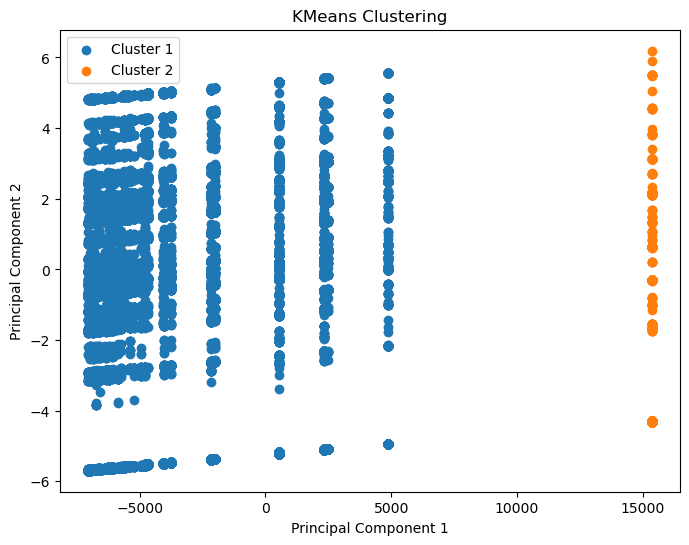

In [24]:
from sklearn.decomposition import PCA

n_clusters = 2

# Applying PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(ohe)

# Plotting the clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(reduced_data[kmeans_clusters == i, 0], reduced_data[kmeans_clusters == i, 1], label=f'Cluster {i+1}')

plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


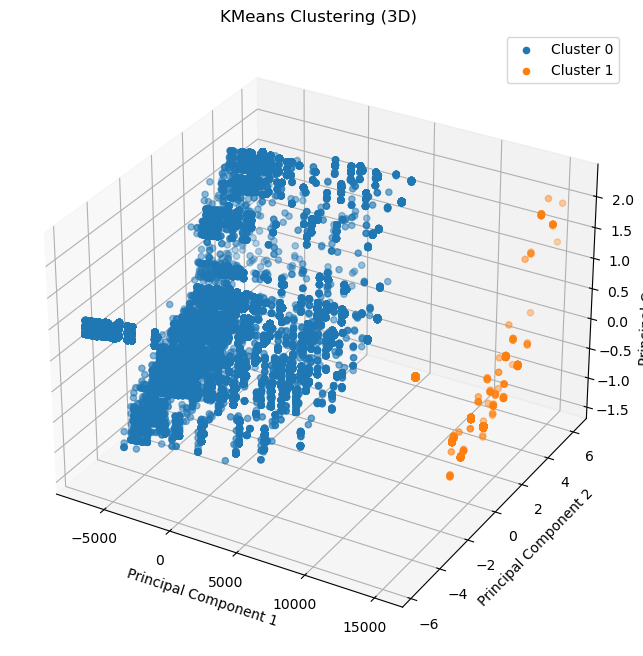

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

n_clusters = 2

# Applying PCA to reduce data to 3 dimensions
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(ohe)

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    ax.scatter(reduced_data[kmeans_clusters == i, 0], reduced_data[kmeans_clusters == i, 1], 
               reduced_data[kmeans_clusters == i, 2], label=f'Cluster {i}')

ax.set_title('KMeans Clustering (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


In [26]:
import plotly.graph_objects as go
from sklearn.decomposition import PCA

n_clusters = 2

# Applying PCA to reduce data to 3 dimensions
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(ohe)

# Create a trace for each cluster
dataa = []
for i in range(n_clusters):
    trace = go.Scatter3d(
        x=reduced_data[kmeans_clusters == i, 0],
        y=reduced_data[kmeans_clusters == i, 1],
        z=reduced_data[kmeans_clusters == i, 2],
        mode='markers',
        name=f'Cluster {i}',
        marker=dict(size=5)
    )
    dataa.append(trace)

# Create the layout for the plot
layout = go.Layout(
    title='KMeans Clustering (3D)',
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3',
    )
)

# Create the figure and plot it
fig = go.Figure(data=dataa, layout=layout)
fig.show()


# Metrics

In [22]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score



# Calculate the silhouette score (ranges from -1 to 1, higher is better)
silhouette_avg = silhouette_score(ohe, kmeans_clusters)
print("Silhouette Score:", silhouette_avg)

# Calculate the Davies-Bouldin index (lower is better)
davies_bouldin_avg = davies_bouldin_score(ohe, kmeans_clusters)
print("Davies-Bouldin Index:", davies_bouldin_avg)

# Calculate the Calinski ()
calinski_harabasz_score_avg = calinski_harabasz_score(ohe, kmeans_clusters)
print("Calinski Score:", calinski_harabasz_score_avg)

# Get the sum of squared distances of samples to their closest cluster center (inertia)
inertia = kmeans.inertia_
print("Inertia:", inertia)


Silhouette Score: 0.803723781830307
Davies-Bouldin Index: 0.17192036287384005
Calinski Score: 276843.5961409916
Inertia: 650391861391.8457


# CI Scores Analysis for Assign labels

In [27]:
scores_cols = ['CI SCORE', 'CI SCORE GLOVE', 'CI SCORE GLOVE 2','CI SCORE GLOVE 50']
df = pd.concat([clustered_data, data[scores_cols]],axis=1)
df.head(3)
# df.to_csv('full_catg_data_clustered_ssim_V3.csv',index=False)

index Vulnerability Type(s)  \
0      1                   XSS   
1      2               Unknown   
2      3               Unknown   

                                  Vulnerability Name  Access Complexity  \
0  Failure to Preserve Web Page Structure ('Cross...  Remote     Medium   
1                            Improper Authentication  Remote        Low   
2  URL Redirection to Untrusted Site ('Open Redir...  Remote     Medium   

  Authentication    Conf.   Integ.    Avail  Score  \
0   Not required     None  Partial     None    4.3   
1   Not required  Partial  Partial  Partial    7.5   
2   Not required  Partial  Partial     None    5.8   

   Number Of Related Vulnerabilities  Kmeans_clusters  CI SCORE  \
0                            22413.0                1  0.666677   
1                             3011.0                0  0.625171   
2                              754.0                0  0.636100   

   CI SCORE GLOVE  CI SCORE GLOVE 2  CI SCORE GLOVE 50  
0        0.698982          0.620250           0.764294  
1        0.632779          0.567375           0.694202  
2        0.627934          0.573071           0.692237

In [28]:
df['CI MEAN SCORES'] = (df['CI SCORE']+df['CI SCORE GLOVE']+df['CI SCORE GLOVE 2']+df['CI SCORE GLOVE 50']) / 4

In [29]:
# Imbalenced data
df['Kmeans_clusters'].value_counts()

Kmeans_clusters
0    51386
1    10312
Name: count, dtype: int64

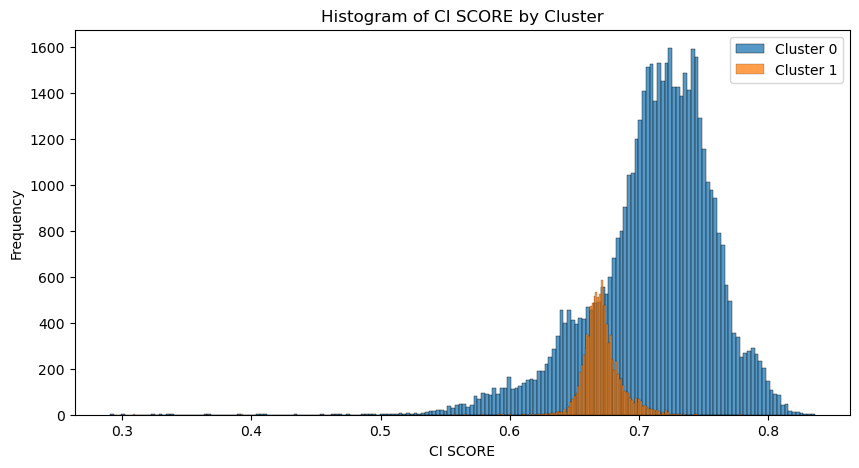

Kmeans_clusters
0    0.711260
1    0.671589
Name: CI SCORE, dtype: float64


0.6914245

In [30]:
# Distribution for each cluster

def plot_dist(clusters_col,score_col):
    cluster_0 = df[df[clusters_col]==0]
    cluster_0_scores = cluster_0[score_col]
    cluster_1 = df[df[clusters_col]==1]
    cluster_1_scores = cluster_1[score_col]
    
    plt.figure(figsize=(10,5))
    sn.histplot(cluster_0_scores,label='Cluster 0')
    sn.histplot(cluster_1_scores,label='Cluster 1')
    
    plt.title(f'Histogram of {score_col} by Cluster')
    plt.xlabel('CI SCORE')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_dist(
    clusters_col = 'Kmeans_clusters',
    score_col = 'CI SCORE'
)
print(df.groupby('Kmeans_clusters')['CI SCORE'].mean())
threshold = (0.711260 + 0.671589) / 2
threshold

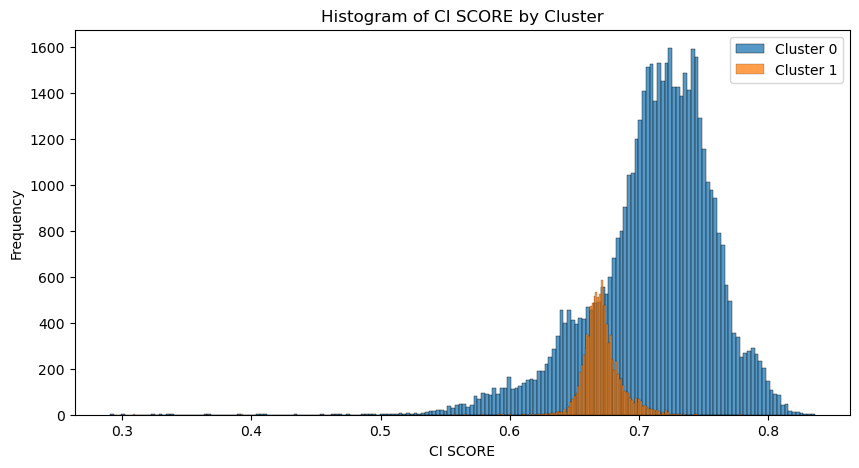

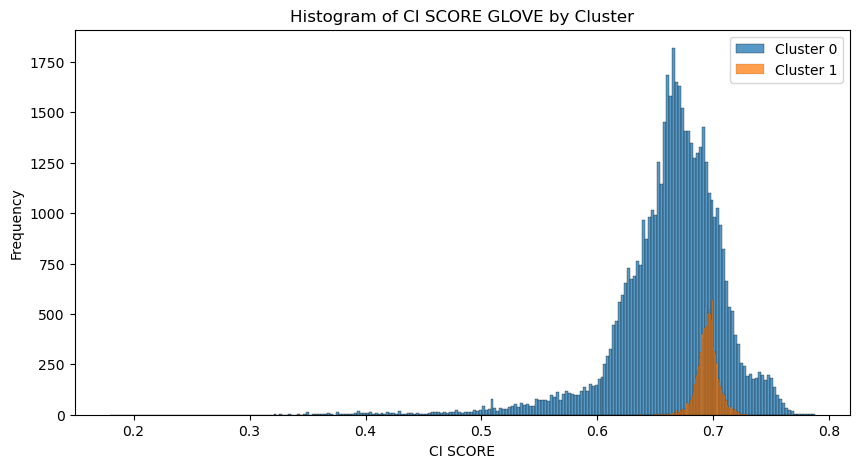

Kmeans_clusters
0    0.663213
1    0.694875
Name: CI SCORE GLOVE, dtype: float64 



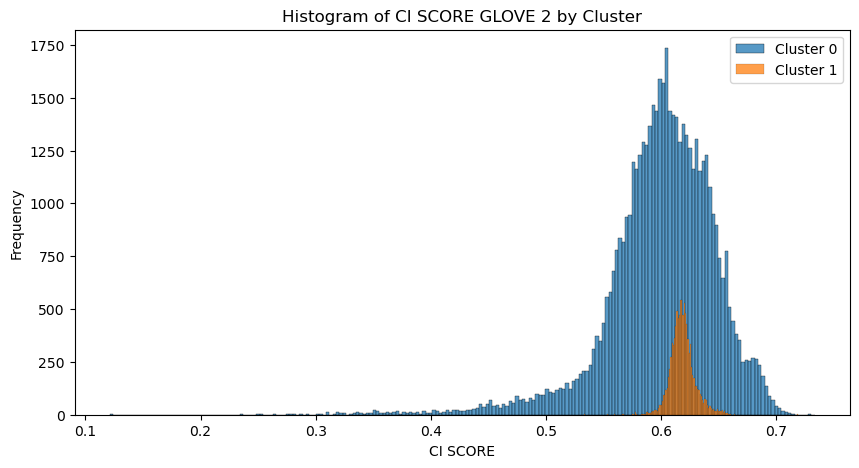

Kmeans_clusters
0    0.600123
1    0.618635
Name: CI SCORE GLOVE 2, dtype: float64


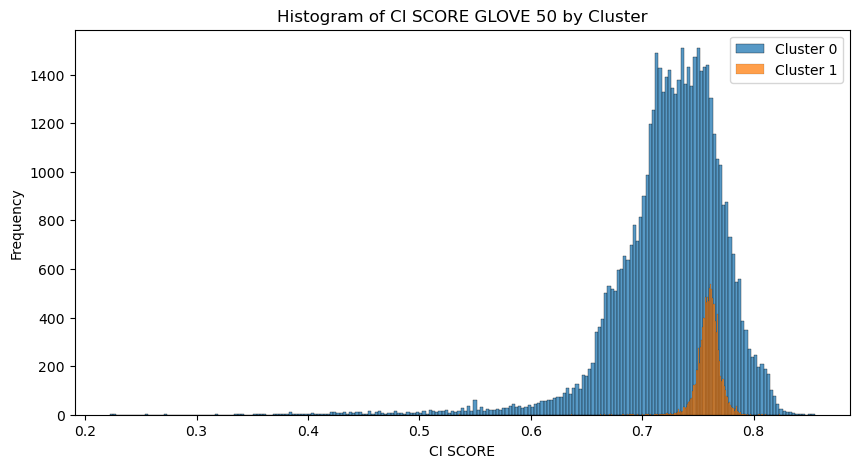

Kmeans_clusters
0    0.725623
1    0.759819
Name: CI SCORE GLOVE 50, dtype: float64


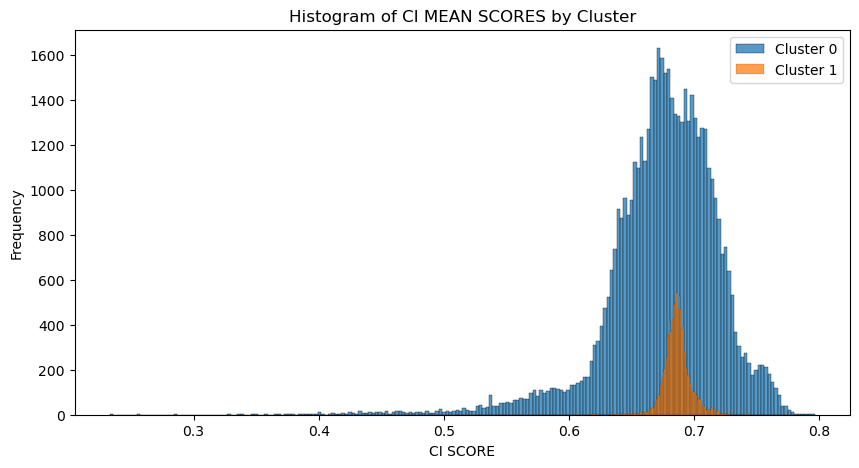

Kmeans_clusters
0    0.675055
1    0.686230
Name: CI MEAN SCORES, dtype: float64


In [31]:

# word2vec-spacy-lg
plot_dist(
    clusters_col = 'Kmeans_clusters',
    score_col = 'CI SCORE'
)
df.groupby('Kmeans_clusters')['CI SCORE'].mean()

# glove-wiki-gigaword-100
plot_dist(
    clusters_col = 'Kmeans_clusters',
    score_col = 'CI SCORE GLOVE'
)
print(df.groupby('Kmeans_clusters')['CI SCORE GLOVE'].mean(),'\n')

# glove-wiki-gigaword-200
plot_dist(
    clusters_col = 'Kmeans_clusters',
    score_col = 'CI SCORE GLOVE 2'
)
print(df.groupby('Kmeans_clusters')['CI SCORE GLOVE 2'].mean())

# glove-wiki-gigaword-50
plot_dist(
    clusters_col = 'Kmeans_clusters',
    score_col = 'CI SCORE GLOVE 50'
)
print(df.groupby('Kmeans_clusters')['CI SCORE GLOVE 50'].mean())

# mean scores
plot_dist(
    clusters_col = 'Kmeans_clusters',
    score_col = 'CI MEAN SCORES'
)
print(df.groupby('Kmeans_clusters')['CI MEAN SCORES'].mean())


In [32]:
# 0 : Critical Infrastructure
# 1 : Non CI
df['Label'] = df['Kmeans_clusters'].replace([1,0],['no','yes'])
df['Label'].value_counts()

Label
yes    51386
no     10312
Name: count, dtype: int64

## Remove based on threshold = 0.69

In [124]:
cluster_0 = df[df['Kmeans_clusters']==0]
cluster_0_scores = cluster_0['CI SCORE']
cluster_1 = df[df['Kmeans_clusters']==1]
cluster_1_scores = cluster_1['CI SCORE']

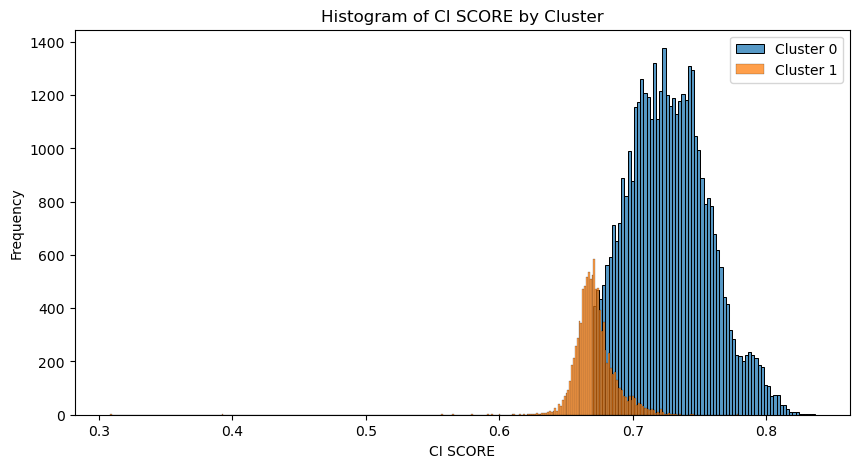

In [125]:
# cas Cluster 0 is the big one 0 = CI
cluster_0_reduced = cluster_0[cluster_0['CI SCORE'] > 0.67]
cluster_0_reduced_scores = cluster_0_reduced['CI SCORE']

cluster_1_reduced = cluster_1[cluster_1['CI SCORE'] < threshold]
cluster_1_reduced_scores = cluster_1_reduced['CI SCORE']

plt.figure(figsize=(10,5))
sn.histplot(cluster_0_reduced_scores,label='Cluster 0')
sn.histplot(cluster_1_scores,label='Cluster 1')

plt.title('Histogram of CI SCORE by Cluster')
plt.xlabel('CI SCORE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [107]:
cluster_0_reduced.shape[0] , cluster_1.shape[0] ,"=", cluster_0_reduced.shape[0] + cluster_1.shape[0]

(42719, 10312, '=', 53031)

In [126]:
df.shape

(61698, 18)

In [112]:
df_reduced = pd.concat([cluster_1_reduced , cluster_0],axis=0)
df_reduced['Kmeans_clusters'].value_counts()

Kmeans_clusters
0    51386
1     9405
Name: count, dtype: int64

In [129]:
df['Kmeans_clusters'].value_counts()

Kmeans_clusters
0    51386
1    10312
Name: count, dtype: int64

In [130]:
51386-37664

13722

In [35]:
# df.to_csv('full_data_labeled.csv',index=False)
df

index Vulnerability Type(s)  \
0          1                   XSS   
1          2               Unknown   
2          3               Unknown   
3          4               Unknown   
4          5               Unknown   
...      ...                   ...   
61693  61694                   XSS   
61694  61695                   DoS   
61695  61696               Unknown   
61696  61697                   XSS   
61697  61698               Unknown   

                                      Vulnerability Name  Access Complexity  \
0      Failure to Preserve Web Page Structure ('Cross...  Remote     Medium   
1                                Improper Authentication  Remote        Low   
2      URL Redirection to Untrusted Site ('Open Redir...  Remote     Medium   
3                              Improper Input Validation  Remote        Low   
4                                            Double Free   Local        Low   
...                                                  ...     ...        ...   
61693  Failure to Preserve Web Page Structure ('Cross...  Remote     Medium   
61694  Uncontrolled Resource Consumption ('Resource E...  Remote        Low   
61695  URL Redirection to Untrusted Site ('Open Redir...  Remote     Medium   
61696  Failure to Preserve Web Page Structure ('Cross...  Remote     Medium   
61697    Cleartext Transmission of Sensitive Information  Remote        Low   

      Authentication    Conf.   Integ.    Avail  Score  \
0       Not required     None  Partial     None    4.3   
1       Not required  Partial  Partial  Partial    7.5   
2       Not required  Partial  Partial     None    5.8   
3       Not required     None  Partial     None    5.0   
4       Not required  Partial     None     None    2.1   
...              ...      ...      ...      ...    ...   
61693   Not required     None  Partial     None    4.3   
61694   Not required     None     None  Partial    5.0   
61695   Not required  Partial  Partial     None    5.8   
61696   Not required     None  Partial     None    4.3   
61697   Not required  Partial     None     None    5.0   

       Number Of Related Vulnerabilities  Kmeans_clusters  CI SCORE  \
0                                22413.0                1  0.666677   
1                                 3011.0                0  0.625171   
2                                  754.0                0  0.636100   
3                                 9380.0                0  0.719175   
4                                  394.0                0  0.707726   
...                                  ...              ...       ...   
61693                            22413.0                1  0.706891   
61694                             1320.0                0  0.789261   
61695                              754.0                0  0.696738   
61696                            22413.0                1  0.711290   
61697                              403.0                0  0.804882   

       CI SCORE GLOVE  CI SCORE GLOVE 2  CI SCORE GLOVE 50  CI MEAN SCORES  \
0            0.698982          0.620250           0.764294        0.687550   
1            0.632779          0.567375           0.694202        0.629882   
2            0.627934          0.573071           0.692237        0.632335   
3            0.676609          0.614739           0.752815        0.690835   
4            0.695226          0.627228           0.771792        0.700493   
...               ...               ...                ...             ...   
61693        0.713690          0.645094           0.778859        0.711134   
61694        0.747740          0.679483           0.808397        0.756220   
61695        0.670062          0.621229           0.733526        0.680389   
61696        0.719332          0.651999           0.787095        0.717429   
61697        0.735057          0.689226           0.790883        0.755012   

      Label  
0        no  
1       yes  
2       yes  
3       yes  
4       yes  
...     ...  
61693    no  
61